In [165]:
# Programming-Poetry-Project
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File Location
Poetry_Analysis = "Resources/Poetry_Analysis_Data.csv"

# Read Poetry Analysis Data File As A Pandas Dataframe
Poetry_Analysis_df = pd.read_csv(Poetry_Analysis)
Poetry_Analysis_df.head(5)

,author,content,poem name,age,type,Gender
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore,Male
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore,Female
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore,Male
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore,Male
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore,Male


In [166]:
# Total Genre per Age – Stacked Column Chart (Bilal)
# Create a table with the Age and Genre Type
genre_per_age = Poetry_Analysis_df.groupby(['age', 'type'])['type'].count().unstack()
genre_per_age

type,Love,Mythology & Folklore,Nature
age,,,
Modern,83,40,135
Renaissance,243,19,53


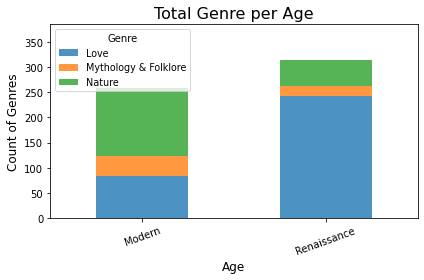

In [167]:
# Create a Stacked Column Chart with the table created with groupby from above
genre_per_age.plot(kind='bar', stacked=True, rot=20, alpha=0.8)
plt.title("Total Genre per Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count of Genres", fontsize=12)
plt.legend(loc="upper left", title = "Genre", fontsize=9.6)
plt.ylim(0, 385)

# Save the graph to the images folder
plt.tight_layout()
plt.savefig("Images/genre_per_age.png")
plt.show()

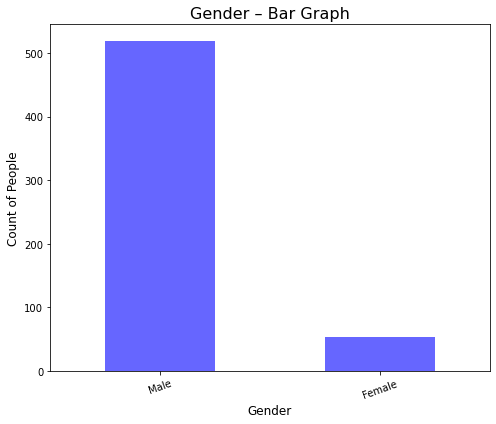

Number of rows present: 573


Male      519
Female     54
Name: Gender, dtype: int64

In [168]:
# Gender – Bar Graph (Bilal)

# Create a bar graph from the "Gender" column in the dataframe
Poetry_Analysis_df['Gender'].value_counts().plot(kind='bar', figsize=(7, 6), rot=20, color='b', alpha=0.6)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count of People", fontsize=12)
plt.title("Gender – Bar Graph", fontsize=16)

# Save the graph to the images folder
plt.tight_layout()
plt.savefig("Images/gender.png")
plt.show()

row_count = print("Number of rows present:", 
      len(Poetry_Analysis_df['Gender']))
Poetry_Analysis_df['Gender'].value_counts()